# DATA 4319: Statistical & Machine Learning 

## Lecture 1: The Perceptron Learning Model (Classical Version)
In this notebook we will implement the perceptron learning model in order to classify data from the [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Our task is to predict the species of flower based off of measurements of sepeal length and width. This task is often referred to as the ''Hello World'' of machine learning.

You will need to add the following packages:
 * CSV [documentation](https://juliadata.github.io/CSV.jl/stable/)
 * Plots [documentation](http://docs.juliaplots.org/latest/)
 

*** Our data is medical records of patients. Some of them have diabetes. We are looking to use the perceptron to determine if our variables can determine yes or no. ***

In [16]:
using CSV
""" Provided you have a saved and valid .csv file in your current working directory, you may 
    load this file as a Dataframe using the following syntax. 
"""
diabetes = CSV.read("C:\\Users\\Shawn\\Desktop\\Spring2019\\ML\\Datasets\\diabetes.csv")
data = diabetes[1:100,1:9]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


*** We will grab the 'Glucose' and 'BMI' columns for our analysis. ***

In [27]:
data = [x for x in zip(diabetes[2], diabetes[6], diabetes[9])]
data

768-element Array{Tuple{Int64,Float64,Int64},1}:
 (148, 33.6, 1)
 (85, 26.6, 0) 
 (183, 23.3, 1)
 (89, 28.1, 0) 
 (137, 43.1, 1)
 (116, 25.6, 0)
 (78, 31.0, 1) 
 (115, 35.3, 0)
 (197, 30.5, 1)
 (125, 0.0, 1) 
 (110, 37.6, 0)
 (168, 38.0, 1)
 (139, 27.1, 0)
 ⋮             
 (137, 32.0, 0)
 (123, 36.3, 1)
 (106, 37.5, 0)
 (190, 35.5, 1)
 (88, 28.4, 0) 
 (170, 44.0, 1)
 (89, 22.5, 0) 
 (101, 32.9, 0)
 (122, 36.8, 0)
 (121, 26.2, 0)
 (126, 30.1, 1)
 (93, 30.4, 0) 

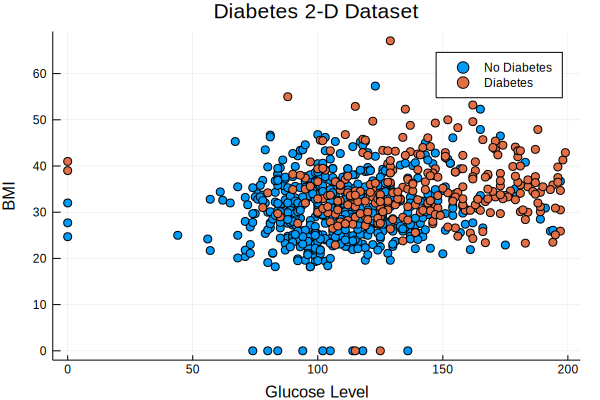

In [28]:
using Plots
scatter([x[1:2] for x in data if x[3] == 0], label = "No Diabetes")
scatter!([x[1:2] for x in data if x[3] != 0], label = "Diabetes")
plot!(title = "Diabetes 2-D Dataset", xlabel = "Glucose Level", ylabel = "BMI")

In [30]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
# This code assigns x1 and x2 to tuples of their values, and assigns the x3 value to a vector of the outcomes (1 or -1).
X, Y = [[x[1], x[2]] for x in data], [x[3] == 1 ? 1 : -1 for x in data]

(Array{Float64,1}[[148.0, 33.6], [85.0, 26.6], [183.0, 23.3], [89.0, 28.1], [137.0, 43.1], [116.0, 25.6], [78.0, 31.0], [115.0, 35.3], [197.0, 30.5], [125.0, 0.0]  …  [106.0, 37.5], [190.0, 35.5], [88.0, 28.4], [170.0, 44.0], [89.0, 22.5], [101.0, 32.9], [122.0, 36.8], [121.0, 26.2], [126.0, 30.1], [93.0, 30.4]], [1, -1, 1, -1, 1, -1, 1, -1, 1, 1  …  -1, 1, -1, 1, -1, -1, -1, -1, 1, -1])

In [31]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function definition
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

h (generic function with 1 method)

In [32]:
# Perceptron Learning Algorithm definition
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA (generic function with 1 method)

In [73]:
# Iterate the PLA 
for i = 1:3000
    # Choose random entries to update (if possible )
    j = rand(1:100)
    w = PLA(w, X[j], Y[j])
end

In [39]:
# Create a user friendly function that predicts the species of a given flower
function predictor(n)
    return h(w, X[n]) == 1 ? "Diabetes" : "No Diabetes"
end


predictor (generic function with 1 method)

In [76]:
# Test your predictions!
predictor(50)

"No Diabetes"

*** In conclusion, we cannot reliably use the perceptron to analyze data that is not linearly separable.***